In [26]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [12]:
def change(df,pred_label):
    for i in df:
        if i=='[0]':
            pred_label.append(0)
        else:
            pred_label.append(1)
    return pred_label

In [6]:
import pandas as pd

def balance_true_labels(df, true_label_column):
    """
    Balances the dataset by making the count of `0` and `1` in the `true_label_column` equal.
    
    Parameters:
        df (pd.DataFrame): The original DataFrame.
        true_label_column (str): The column name of the true labels.

    Returns:
        pd.DataFrame: A new DataFrame with balanced rows.
    """
    # Filter rows with true_label = 1
    ones = df[df[true_label_column] == 1]
    
    # Filter rows with true_label = 0
    zeros = df[df[true_label_column] == 0]
    
    # Target size is the number of rows where true_label = 1
    target_size = len(ones)
    
    # Randomly sample from rows where true_label = 0
    sampled_zeros = zeros.sample(n=target_size, replace=False, random_state=42)
    
    # Combine sampled zeros and ones
    balanced_df = pd.concat([ones, sampled_zeros]).reset_index(drop=True)
    
    return balanced_df

### XLM_BIASCORP

In [4]:
xlm_biascorp = pd.read_csv("xlm-r-racismo results.csv")
xlm_biascorp.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label,racism_prediction
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0,[0]
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0,[0]
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0,[0]
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1,[0]
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0,[0]


In [ ]:
def change(df,pred_label):
    for i in df:
        if i=='[0]':
            pred_label.append(0)
        else:
            pred_label.append(1)
xlm_biascorp['racism_prediction'] = pred_label
xlm_biascorp.head()

Accuracy: 0.5174
F1 Score: 0.3221
Confusion Matrix:
[[17615  5007]
 [16097  5013]]


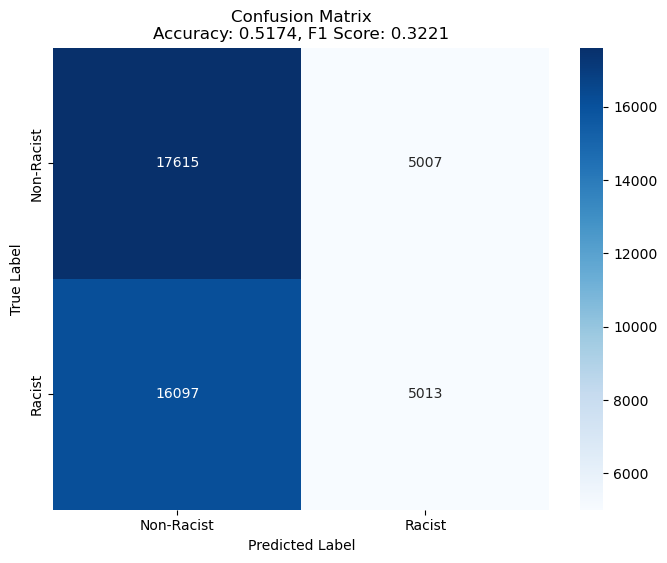

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

accuracy = accuracy_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
precision = precision_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
recall = recall_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
f1 = f1_score(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])
conf_matrix = confusion_matrix(xlm_biascorp['true_label'], xlm_biascorp['racism_prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()



### XLM_KAGGLE

In [32]:
xlm_kaggle = pd.read_csv("xlm_kaggle.csv")
xlm_kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment,prediction
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral,[0]
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive,[0]
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral,[0]
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral,[0]
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral,[0]


In [14]:
prediction = []
xlm_kaggle['prediction'] = change(xlm_kaggle['prediction'],prediction)
xlm_kaggle.head()

NameError: name 'xlm_kaggle' is not defined

In [38]:
xlm_kaggle['true_label'] = xlm_kaggle['TextBlob Sentiment'].map({"Positive": 0, "Neutral": 0, "Negative": 1})
xlm_kaggle.head()

,date,tweet,cleanText,TextBlob Sentiment,prediction,true_label
0,6/3/2021,@HyperSnoc @Echo31334604 @im_not_kit Racism h...,hypersnoc echo im_not_kit racism,Neutral,0,0
1,6/3/2021,@manoutdoors4 @AJ_Lady_Liberty @FBIWFO @TheJus...,manoutdoor aj_lady_liberti fbiwfo thejusticede...,Positive,0,0
2,6/3/2021,#TrumpIsNotWell https://t.co/JJl8j4dRK9,trumpisnotwel,Neutral,0,0
3,6/3/2021,"@KateWilliamsme @AnnaBethS4 ðŸš¨ ""Racism is ex...",katewilliamsm annabeth ðÿš racism exempt queen...,Neutral,0,0
4,6/3/2021,@WGNNews â€˜Critical race theoryâ€™ is nothing...,wgnnew critic race theoryâ noth teach hatr big...,Neutral,0,0


In [42]:
import pandas as pd

def balance_true_labels(df, true_label_column):
    """
    Balances the dataset by making the count of `0` and `1` in the `true_label_column` equal.
    
    Parameters:
        df (pd.DataFrame): The original DataFrame.
        true_label_column (str): The column name of the true labels.

    Returns:
        pd.DataFrame: A new DataFrame with balanced rows.
    """
    # Filter rows with true_label = 1
    ones = df[df[true_label_column] == 1]
    
    # Filter rows with true_label = 0
    zeros = df[df[true_label_column] == 0]
    
    # Target size is the number of rows where true_label = 1
    target_size = len(ones)
    
    # Randomly sample from rows where true_label = 0
    sampled_zeros = zeros.sample(n=target_size, replace=False, random_state=42)
    
    # Combine sampled zeros and ones
    balanced_df = pd.concat([ones, sampled_zeros]).reset_index(drop=True)
    
    return balanced_df


In [48]:
xlm_kaggle_balanced = balance_true_labels(xlm_kaggle,"true_label")
xlm_kaggle_balanced['true_label'].value_counts()

true_label
1    53533
0    53533
Name: count, dtype: int64

In [40]:
xlm_kaggle['true_label'].value_counts()

true_label
0    116115
1     53533
Name: count, dtype: int64

Accuracy: 0.6597
Precision: 0.3694
Recall: 0.1109
F1 Score: 0.1706
Confusion Matrix:
[[105975  10140]
 [ 47594   5939]]


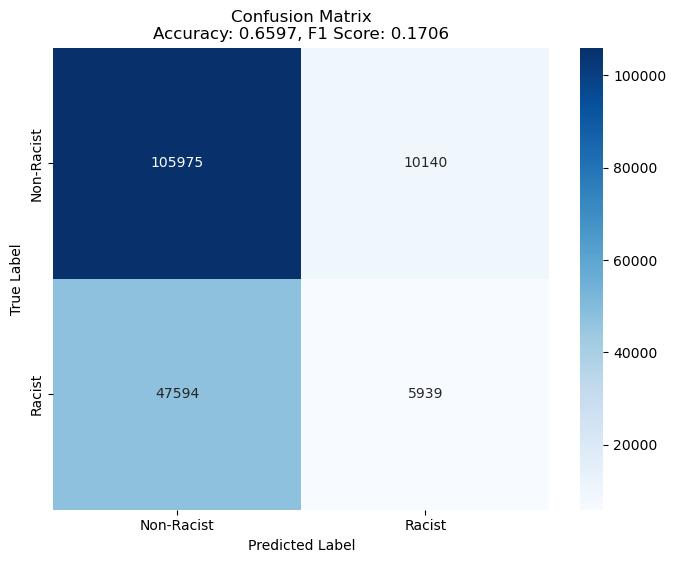

In [47]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
precision = precision_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
recall = recall_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
f1 = f1_score(xlm_kaggle['true_label'], xlm_kaggle['prediction'])
conf_matrix = confusion_matrix(xlm_kaggle['true_label'], xlm_kaggle['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

Accuracy: 0.5122
F1 Score: 0.1853
Confusion Matrix:
[[48895  4638]
 [47594  5939]]


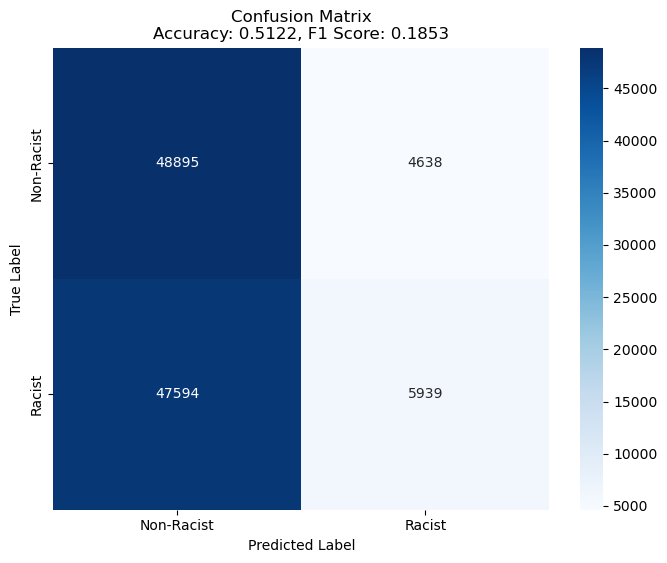

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
# Calculate Metrics only

# Balanced Dataframe
accuracy = accuracy_score(xlm_kaggle_balanced['true_label'], xlm_kaggle_balanced['prediction'])
f1 = f1_score(xlm_kaggle_balanced['true_label'], xlm_kaggle_balanced['prediction'])
conf_matrix = confusion_matrix(xlm_kaggle_balanced['true_label'], xlm_kaggle_balanced['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### XLM_SAKREN

In [8]:
xlm_sakren = pd.read_csv('xlm_sakren.csv')
xlm_sakren.head()

,index,id,Text,Annotation,oh_label,prediction
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,[1]
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,[0]
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,[1]
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,[0]
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,[0]


In [16]:
prediction = []
xlm_sakren['prediction'] = change(xlm_sakren['prediction'],prediction)
xlm_sakren.head()

,index,id,Text,Annotation,oh_label,prediction
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,1
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,0


Accuracy: 0.8535
Precision: 0.4984
Recall: 0.3157
F1 Score: 0.3866
Confusion Matrix:
[[10875   626]
 [ 1348   622]]


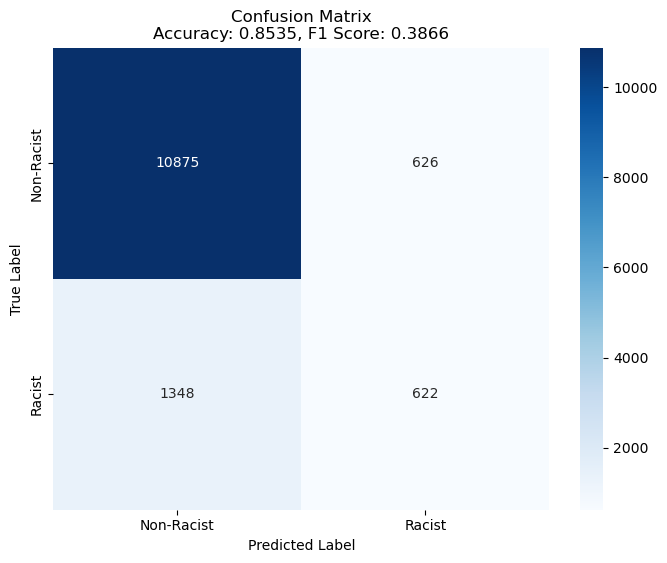

In [58]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
precision = precision_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
recall = recall_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
f1 = f1_score(xlm_sakren['oh_label'], xlm_sakren['prediction'])
conf_matrix = confusion_matrix(xlm_sakren['oh_label'], xlm_sakren['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [18]:
xlm_sakren['oh_label'].value_counts()

oh_label
0    11501
1     1970
Name: count, dtype: int64

In [22]:
xlm_sakren_balanced = balance_true_labels(xlm_sakren, 'oh_label')

In [24]:
xlm_sakren_balanced['oh_label'].value_counts()

oh_label
1    1970
0    1970
Name: count, dtype: int64

Accuracy: 0.6312
F1 Score: 0.4613
Confusion Matrix:
[[1865  105]
 [1348  622]]


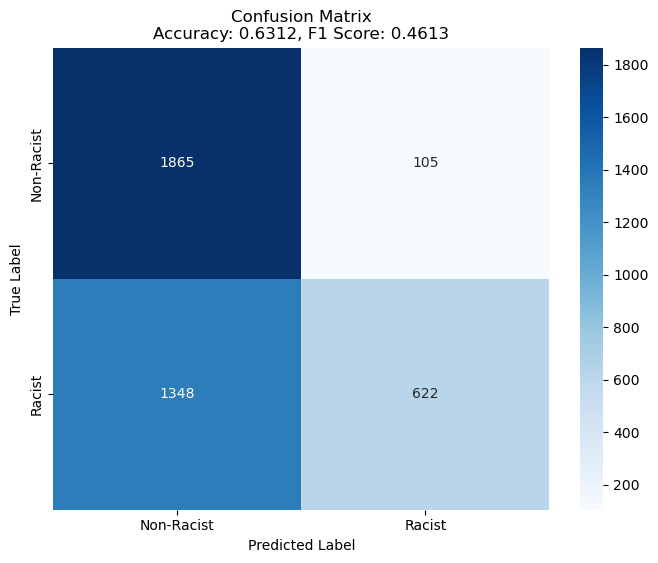

In [32]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_sakren_balanced['oh_label'], xlm_sakren_balanced['prediction'])
f1 = f1_score(xlm_sakren_balanced['oh_label'], xlm_sakren_balanced['prediction'])
conf_matrix = confusion_matrix(xlm_sakren_balanced['oh_label'], xlm_sakren_balanced['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### XLM_TWITTER

In [34]:
xlm_twitter = pd.read_csv('xlm_twitter.csv')
xlm_twitter.head()

,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,[0]
1,0,@user @user thanks for #lyft credit i can't us...,[0]
2,0,bihday your majesty,[0]
3,0,#model i love u take with u all the time in ...,[0]
4,0,factsguide: society now #motivation,[0]


In [36]:
prediction = []
xlm_twitter['prediction'] = change(xlm_twitter['prediction'],prediction)
xlm_twitter.head()

,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,0
1,0,@user @user thanks for #lyft credit i can't us...,0
2,0,bihday your majesty,0
3,0,#model i love u take with u all the time in ...,0
4,0,factsguide: society now #motivation,0


In [38]:
xlm_twitter['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [40]:
xlm_twitter_balanced = balance_true_labels(xlm_twitter, 'label')
xlm_twitter_balanced['label'].value_counts()

label
1    2242
0    2242
Name: count, dtype: int64

Accuracy: 0.9009
Precision: 0.1430
Recall: 0.0825
F1 Score: 0.1046
Confusion Matrix:
[[28611  1109]
 [ 2057   185]]


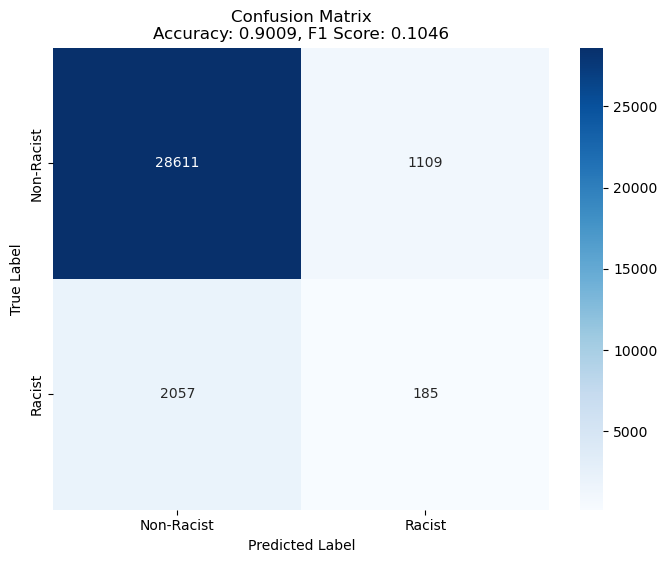

In [68]:
# Calculate Metrics only
accuracy = accuracy_score(xlm_twitter['label'], xlm_twitter['prediction'])
precision = precision_score(xlm_twitter['label'], xlm_twitter['prediction'])
recall = recall_score(xlm_twitter['label'], xlm_twitter['prediction'])
f1 = f1_score(xlm_twitter['label'], xlm_twitter['prediction'])
conf_matrix = confusion_matrix(xlm_twitter['label'], xlm_twitter['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

Accuracy: 0.5227
F1 Score: 0.1474
Confusion Matrix:
[[2159   83]
 [2057  185]]


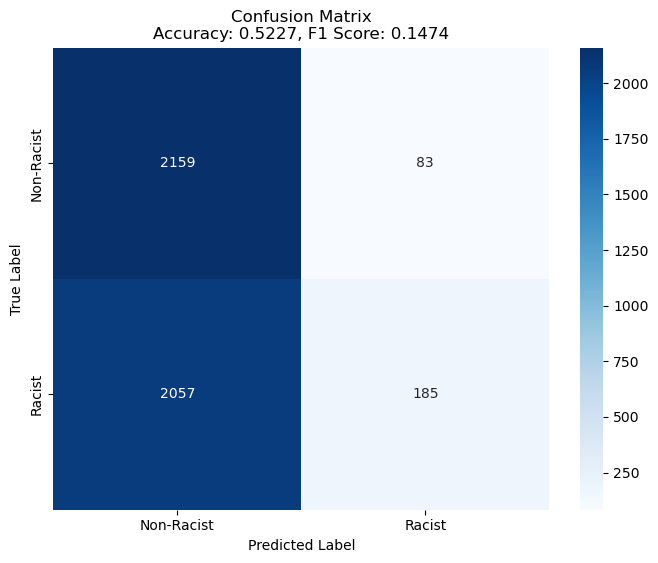

In [42]:
# Balanced dataset

# Calculate Metrics only
accuracy = accuracy_score(xlm_twitter_balanced['label'], xlm_twitter_balanced['prediction'])
f1 = f1_score(xlm_twitter_balanced['label'], xlm_twitter_balanced['prediction'])
conf_matrix = confusion_matrix(xlm_twitter_balanced['label'], xlm_twitter_balanced['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

### ROBERTA_BIASCORP

In [77]:
roberta_bias = pd.read_csv('roberta_results.csv')
roberta_bias.head()

,text,bias_1,bias_2,bias_3,confidence_1,confidence_2,confidence_3,time_1,time_2,time_3,sentiment_score,source,weighted_bias,true_label,troberta_prediction
0,"'' Democrats needed someone like Obama, half w...",4,3,2,4,3,5,82,94,295,0.205548,BB,2.916667,0,NOT-HATE
1,'Greatest threat to the Black Famiky is the wh...,1,3,4,6,6,4,48,37,23,-0.189737,BB,2.500000,0,NOT-HATE
2,"'In March, Black Lives Matter activists marche...",3,3,2,7,7,7,140,2495,75,-0.282843,BB,2.666667,0,NOT-HATE
3,"'Rogue'' Chinese Virologist Joins Twitter, Pub...",5,4,3,8,9,7,3900,6838,85,-0.094491,BB,4.041667,1,NOT-HATE
4,'What this means is he could have told black p...,2,3,3,8,7,6,9302,4203,43,-0.347440,BB,2.619048,0,NOT-HATE


In [79]:
roberta_bias['troberta_prediction'] = roberta_bias['troberta_prediction'].map({'NOT-HATE':0,'HATE':1})

In [93]:
roberta_bias['true_label'].value_counts()

true_label
0    22622
1    21110
Name: count, dtype: int64

Accuracy: 0.5193
F1 Score: 0.1881
Confusion Matrix:
[[20273  2349]
 [18675  2435]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'xticktrue_labels'

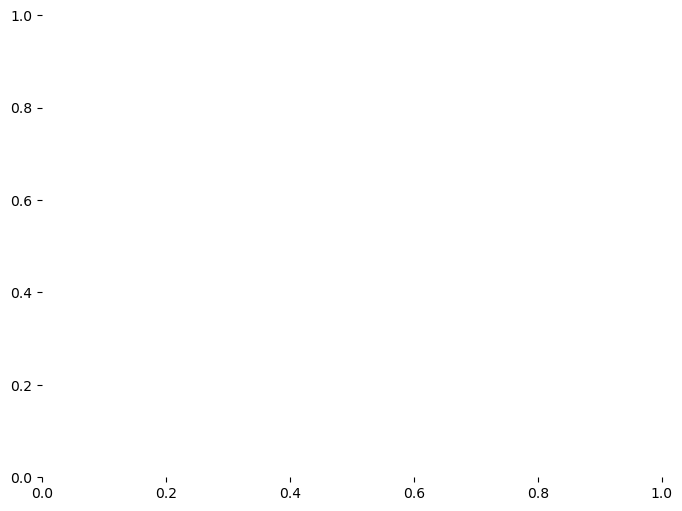

In [83]:
# Calculate Metrics only
accuracy = accuracy_score(roberta_bias['true_label'], roberta_bias['troberta_prediction'])
f1 = f1_score(roberta_bias['true_label'], roberta_bias['troberta_prediction'])
conf_matrix = confusion_matrix(roberta_bias['true_label'], roberta_bias['troberta_prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticktrue_labels=["Non-Racist", "Racist"], yticktrue_labels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xtrue_label("Predicted true_label")
ax.set_ytrue_label("True true_label")
plt.show()

### ROBERTA_SAKREN

In [45]:
roberta_sakren = pd.read_csv("roberta_sakren.csv")
roberta_sakren.head()

,index,id,Text,Annotation,oh_label,roberta_sakren
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,none
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,none
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,racism
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,none
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,none


In [47]:
roberta_sakren_balanced = balance_true_labels(roberta_sakren,"oh_label")
roberta_sakren_balanced['oh_label'].value_counts()

oh_label
1    1970
0    1970
Name: count, dtype: int64

Accuracy: 0.6827
F1 Score: 0.5760
Confusion Matrix:
[[1841  129]
 [1121  849]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'xticktrue_labels'

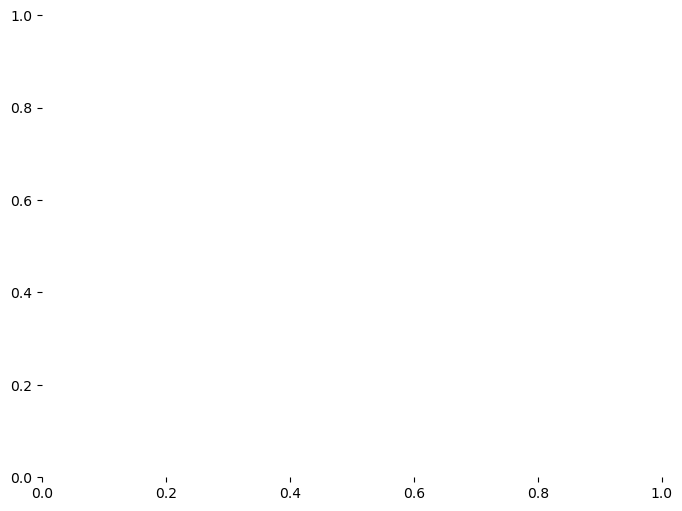

In [51]:
#Balanced Dataset
roberta_sakren_balanced['prediction'] = roberta_sakren_balanced['roberta_sakren'].map({'none':0,'racism':1}) 
# Calculate Metrics only
accuracy = accuracy_score(roberta_sakren_balanced['oh_label'], roberta_sakren_balanced['prediction'])
f1 = f1_score(roberta_sakren_balanced['oh_label'], roberta_sakren_balanced['prediction'])
conf_matrix = confusion_matrix(roberta_sakren_balanced['oh_label'], roberta_sakren_balanced['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticktrue_labels=["Non-Racist", "Racist"], yticktrue_labels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xtrue_label("Predicted true_label")
ax.set_ytrue_label("True true_label")
plt.show()

### ROBERTA_TWITTER

In [54]:
roberta_twitter = pd.read_csv('roberta_twitter.csv')
roberta_twitter.head()

,label,tweet,prediction
0,0,@user when a father is dysfunctional and is so...,NOT-HATE
1,0,@user @user thanks for #lyft credit i can't us...,NOT-HATE
2,0,bihday your majesty,NOT-HATE
3,0,#model i love u take with u all the time in ...,NOT-HATE
4,0,factsguide: society now #motivation,NOT-HATE


In [56]:
roberta_twitter_balanced = balance_true_labels(roberta_twitter, 'label')
roberta_twitter_balanced['label'].value_counts()

label
1    2242
0    2242
Name: count, dtype: int64

Accuracy: 0.5745
F1 Score: 0.3016
Confusion Matrix:
[[2164   78]
 [1830  412]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'xticktrue_labels'

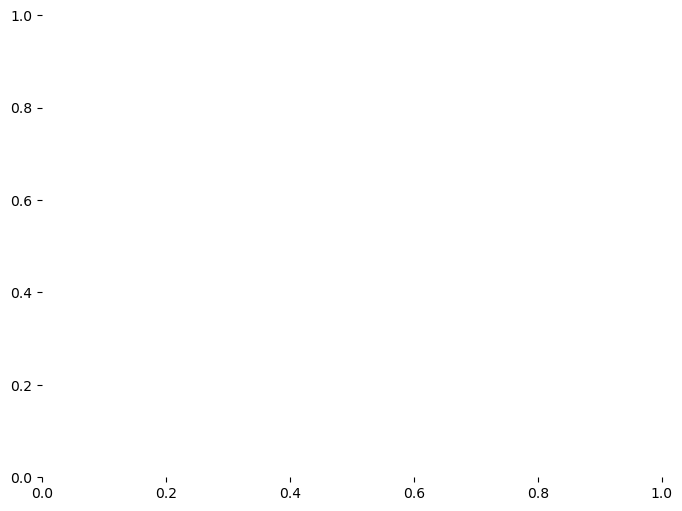

In [58]:
#Balanced Dataset
roberta_twitter_balanced['prediction'] = roberta_twitter_balanced['prediction'].map({'NOT-HATE':0,'HATE':1}) 
# Calculate Metrics only
accuracy = accuracy_score(roberta_twitter_balanced['label'], roberta_twitter_balanced['prediction'])
f1 = f1_score(roberta_twitter_balanced['label'], roberta_twitter_balanced['prediction'])
conf_matrix = confusion_matrix(roberta_twitter_balanced['label'], roberta_twitter_balanced['prediction'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticktrue_labels=["Non-Racist", "Racist"], yticktrue_labels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xtrue_label("Predicted true_label")
ax.set_ytrue_label("True true_label")
plt.show()

### DEBERTA_SAKREN

In [61]:
deberta_sakren = pd.read_csv('deberta_sakren.csv')
deberta_sakren.head()

,index,id,Text,Annotation,oh_label,pred_label,pred_score,pred_label_binary
0,5.767493e+17,5.767493e+17,@AAlwuhaib1977 Muslim mob violence against Hin...,racism,1,racism,0.665677,1
1,5.408905e+17,5.408905e+17,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG,none,0,not_racism,0.812705,0
2,5.678433e+17,5.678433e+17,@jncatron @isra_jourisra @AMPalestine Islamoph...,racism,1,not_racism,0.584880,0
3,5.766462e+17,5.766462e+17,"Finally I'm all caught up, and that sudden dea...",none,0,not_racism,0.745140,0
4,5.713492e+17,5.713492e+17,@carolinesinders @herecomesfran *hugs*,none,0,not_racism,0.530360,0


In [63]:
deberta_sakren_balanced = balance_true_labels(deberta_sakren, 'oh_label')
deberta_sakren_balanced['oh_label'].value_counts()

oh_label
1    1970
0    1970
Name: count, dtype: int64

Accuracy: 0.6069
F1 Score: 0.4095
Confusion Matrix:
[[1854  116]
 [1433  537]]


AttributeError: QuadMesh.set() got an unexpected keyword argument 'xtickoh_labels'

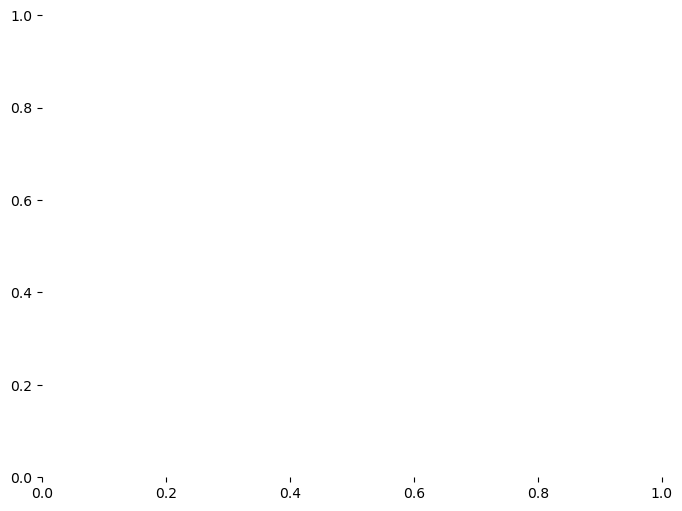

In [65]:
# Calculate Metrics only
accuracy = accuracy_score(deberta_sakren_balanced['oh_label'], deberta_sakren_balanced['pred_label_binary'])
f1 = f1_score(deberta_sakren_balanced['oh_label'], deberta_sakren_balanced['pred_label_binary'])
conf_matrix = confusion_matrix(deberta_sakren_balanced['oh_label'], deberta_sakren_balanced['pred_label_binary'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xtickoh_labels=["Non-Racist", "Racist"], ytickoh_labels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xoh_label("Predicted oh_label")
ax.set_yoh_label("True oh_label")
plt.show()

### DEBERTA_TWITTER

In [68]:
deberta_twitter = pd.read_csv('deberta_twitter.csv')
deberta_twitter.head()

,label,tweet,pred_label,pred_score,prediction_binary
0,0,@user when a father is dysfunctional and is so...,not_racism,0.769868,0
1,0,@user @user thanks for #lyft credit i can't us...,not_racism,0.842056,0
2,0,bihday your majesty,not_racism,0.858498,0
3,0,#model i love u take with u all the time in ...,not_racism,0.717881,0
4,0,factsguide: society now #motivation,not_racism,0.785210,0


In [70]:
deberta_twitter_balanced = balance_true_labels(deberta_twitter, 'label')
deberta_twitter_balanced['label'].value_counts()

label
1    2242
0    2242
Name: count, dtype: int64

Accuracy: 0.5852
F1 Score: 0.3028
Confusion Matrix:
[[2220   22]
 [1838  404]]


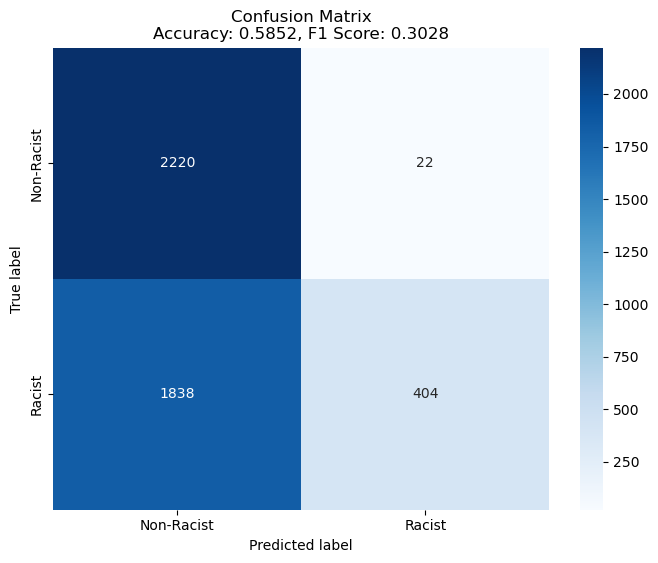

In [74]:
# Calculate Metrics only
accuracy = accuracy_score(deberta_twitter_balanced['label'], deberta_twitter_balanced['prediction_binary'])
f1 = f1_score(deberta_twitter_balanced['label'], deberta_twitter_balanced['prediction_binary'])
conf_matrix = confusion_matrix(deberta_twitter_balanced['label'], deberta_twitter_balanced['prediction_binary'])

# Display the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                 xticklabels=["Non-Racist", "Racist"], yticklabels=["Non-Racist", "Racist"])
ax.set_title(f"Confusion Matrix\nAccuracy: {accuracy:.4f}, F1 Score: {f1:.4f}")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
plt.show()
